# Other graphs and data playground

Significance is $p<0.05$

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [30]:
eps = pd.read_csv("data/cme/eps_estimates.csv", parse_dates=["Date"])
vix = pd.read_csv("data/vix/daily_close.csv", delimiter="\t", parse_dates=["Dates"]).rename(columns={"Dates": "Date"})
move = pd.read_csv("data/move/daily_ohlc.csv", delimiter="\t", parse_dates=["Exchange Date"]).rename(columns={"Exchange Date": "Date"})

eps = eps.set_index("Date").sort_index()
vix = vix.set_index("Date").sort_index()
move = move.set_index("Date").sort_index()

# Use Median estimate
eps["d_est"] = eps["Median"].diff()

In [31]:
df = eps.join(vix["Close"].rename("VIX"), how="inner")
df = df.join(move["Close"].rename("MOVE"), how="inner")

df = df.dropna()

In [32]:
X = sm.add_constant(df[["VIX", "MOVE"]])
y = df["d_est"]

model = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags":5})
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  d_est   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.933
Date:                Fri, 20 Feb 2026   Prob (F-statistic):             0.0202
Time:                        00:39:54   Log-Likelihood:                 1047.0
No. Observations:                 497   AIC:                            -2088.
Df Residuals:                     494   BIC:                            -2075.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0117      0.009     -1.326      0.1

In [33]:
y = df["d_est"].shift(-1)

X = sm.add_constant(df[["VIX", "MOVE"]])
model = sm.OLS(y, X, missing="drop").fit(cov_type="HAC", cov_kwds={"maxlags":5})
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  d_est   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.646
Date:                Fri, 20 Feb 2026   Prob (F-statistic):             0.0719
Time:                        00:39:54   Log-Likelihood:                 1044.2
No. Observations:                 496   AIC:                            -2082.
Df Residuals:                     493   BIC:                            -2070.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0109      0.009     -1.236      0.2

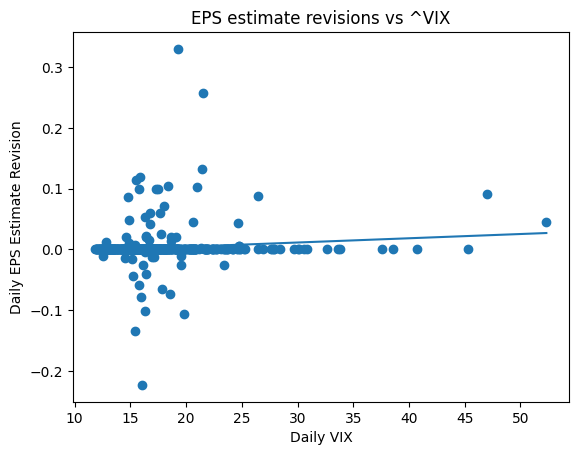

In [34]:
x = df["VIX"].values
y = df["d_est"].values

mask = np.isfinite(x) & np.isfinite(y)
x, y = x[mask], y[mask]

m, b = np.polyfit(x, y, 1)

xs = np.linspace(x.min(), x.max(), 200)

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.plot(xs, m*xs + b)
ax.set_xlabel("Daily VIX")
ax.set_ylabel("Daily EPS Estimate Revision")
ax.set_title("EPS estimate revisions vs ^VIX");